In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math as m
from scipy import integrate 

In [15]:
n = 100
t0 = 0 #s
tf = 50 #s
t = np.linspace(t0,tf, n)
p = (5*np.pi)/18
g = 9.8

x0 = np.array([0,300])

def hori(t, x):

    return np.array([np.cos(p)*x[1], 0])

def vert(t, x):

    return np.array([np.sin(p)*x[1], -g])

In [11]:
def runkutx(f,t,x0):
    n = len(t)
    x = np.zeros((n,len(x0)))
    x[0] = x0[1]*np.cos(p)
    for i in range (0,n-1):
        x[i+1] = x[i] + (t[i+1]-t[i])*f(t[i],x[i])
    return x
def runkuty(f,t,x0):
    n = len(t)
    x = np.zeros((n,len(x0)))
    x[0] = x0[1]*np.sin(p)
    for i in range (0,n-1):
        x[i+1] = x[i] + (t[i+1]-t[i])*f(t[i],x[i]) #need to make fourth order Rk :( #
    return x

In [4]:
hori_rk1 = runkutx(hori, t, x0) 
vert_rk1 = runkuty(vert, t, x0)

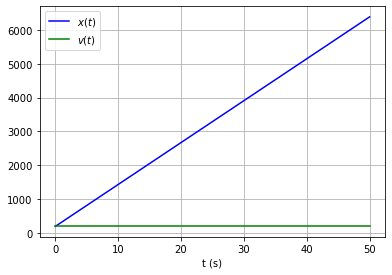

In [5]:
fig = plt.figure('RunKut1')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(t,hori_rk1[ :,0],'b', label=r'$x(t)$')
ax.plot(t,hori_rk1[ :,1], 'g', label=r'$v(t)$')
ax.legend(loc='best')
ax.set_xlabel('t (s)')
ax.grid()

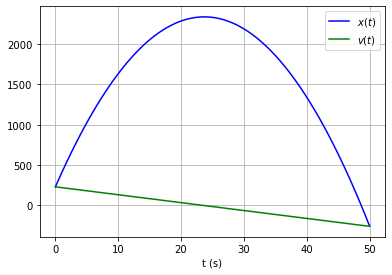

In [6]:
fig = plt.figure('RunKut1')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(t,vert_rk1[ :,0],'b', label=r'$x(t)$')
ax.plot(t,vert_rk1[ :,1], 'g', label=r'$v(t)$')
ax.legend(loc='best')
ax.set_xlabel('t (s)')
ax.grid()

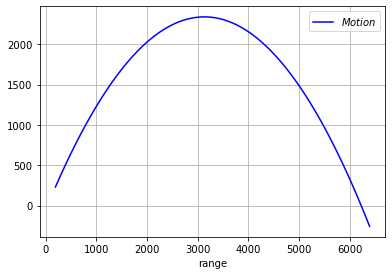

In [7]:
fig = plt.figure('RunKut1')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(hori_rk1[ :,0],vert_rk1[ :,0],'b', label=r'$Motion$')
ax.legend(loc='best')
ax.set_xlabel('range')
ax.grid()

In [8]:
d = 15 #cm
r = d/2
roh = 7.8 #density 
v = (4/3)*m.pi*(r**3) #volume of sphere of radius
c = .005625
m = (roh * v)/1000 #mass in kg

def hori_air(t, x):

    return np.array([np.cos(p)*x[1], (-c*x0[1]*np.cos(p)*x[1])/m])

def vert_air(t, x):

    return np.array([np.sin(p)*x[1], -g - (c*x0[1]*np.sin(p)*x[1])/m])

In [9]:
hori_airrk1 = runkutx(hori_air, t, x0) 
vert_airrk1 = runkuty(vert_air, t, x0)

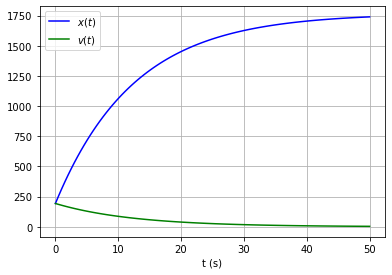

In [19]:
fig = plt.figure('RunKut1')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(t,hori_airrk1[ :,0],'b', label=r'$x(t)$')
ax.plot(t,hori_airrk1[ :,1], 'g', label=r'$v(t)$')
ax.legend(loc='best')
ax.set_xlabel('t (s)')
ax.grid()

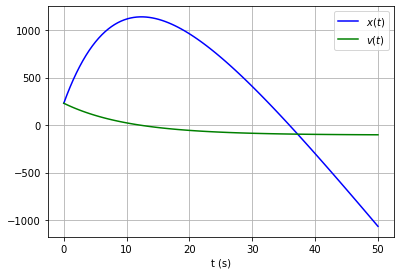

In [20]:
fig = plt.figure('RunKut1')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(t,vert_airrk1[ :,0],'b', label=r'$x(t)$')
ax.plot(t,vert_airrk1[ :,1], 'g', label=r'$v(t)$')
ax.legend(loc='best')
ax.set_xlabel('t (s)')
ax.grid()

In [22]:
ga = .25 #gamma
l = 10000 #lambda
def c(y):
    return ga*(d**2)*np.exp(-y/l)


def hori_aird(t, x):

    return np.array([np.cos(p)*x[1], (-c*x0[1]*np.cos(p)*x[1])/m])

def vert_aird(t, x):

    return np.array([np.sin(p)*x[1], (c*x0[1]*np.sin(p)*x[1])/m])

In [23]:
hori_airrkd = runkutx(hori_aird, t, x0) 
vert_airrkd = runkuty(vert_aird, t, x0)

TypeError: bad operand type for unary -: 'function'